In [3]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from scipy.stats import zscore
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

In [4]:
diet = pd.read_csv(r"diet.csv")
examination = pd.read_csv(r"examination.csv")
labs = pd.read_csv(r"labs.csv")
questionnaire = pd.read_csv(r"questionnaire.csv")
demographic = pd.read_csv(r"demographic.csv")

# EDA

In [5]:
# Count missing values in each column
missing_counts = examination.isnull().sum()

# Identify columns with more than 5000 missing values
examination_drop = missing_counts[missing_counts > 5000].index

# Drop those columns
examination_clean = examination.drop(columns=examination_drop)

# Display the cleaned DataFrame
examination_clean.head()

,SEQN,PEASCST1,PEASCTM1,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,BPXML1,BPXSY1,...,OHX22CTC,OHX23CTC,OHX24CTC,OHX25CTC,OHX26CTC,OHX27CTC,OHX28CTC,OHX29CTC,OHX30CTC,OHX31CTC
0,73557,1,620.0,1.0,4.0,86.0,1.0,1.0,140.0,122.0,...,P,P,P,P,P,P,P,P,P,P
1,73558,1,766.0,1.0,4.0,74.0,1.0,1.0,170.0,156.0,...,S,S,S,S,S,S,Z,S,E,E
2,73559,1,665.0,1.0,4.0,68.0,1.0,1.0,160.0,140.0,...,S,Z,S,S,S,S,S,Z,Z,E
3,73560,1,803.0,1.0,2.0,64.0,1.0,1.0,130.0,108.0,...,D,S,S,S,S,U,D,D,S,U
4,73561,1,949.0,1.0,3.0,92.0,1.0,1.0,170.0,136.0,...,S,Z,R,Z,S,Z,E,E,E,E


In [6]:
# Count missing values in each column
missing_counts = demographic.isnull().sum()

# Identify columns with more than 5000 missing values
demographic_drop = missing_counts[missing_counts > 5000].index

# Drop those columns
demographic_clean = demographic.drop(columns=demographic_drop)

# Display the cleaned DataFrame
demographic_clean.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMQMILIZ,DMDBORN4,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557,8,2,1,69,4,4,1.0,1.0,1,...,3.0,4.0,NaN,13281.237386,13481.042095,1,112,4.0,4.0,0.84
1,73558,8,2,1,54,3,3,1.0,2.0,1,...,3.0,1.0,1.0,23682.057386,24471.769625,1,108,7.0,7.0,1.78
2,73559,8,2,1,72,3,3,2.0,1.0,1,...,4.0,1.0,3.0,57214.803319,57193.285376,1,109,10.0,10.0,4.51
3,73560,8,2,1,9,3,3,1.0,NaN,1,...,3.0,1.0,4.0,55201.178592,55766.512438,2,109,9.0,9.0,2.52
4,73561,8,2,2,73,3,3,1.0,2.0,1,...,5.0,1.0,5.0,63709.667069,65541.871229,2,116,15.0,15.0,5.00


In [7]:
# Count missing values in each column
missing_counts = diet.isnull().sum()

# Identify columns with more than 5000 missing values
diet_drop = missing_counts[missing_counts > 5000].index

# Drop those columns
diet_clean = diet.drop(columns=diet_drop)

# Display the cleaned DataFrame
diet_clean.head()

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,DRD370M,DRD370N,DRD370O,DRD370P,DRD370Q,DRD370R,DRD370S,DRD370T,DRD370U,DRD370V
0,73557,16888.327864,12930.890649,1,49.0,2.0,2.0,6.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73558,17932.143865,12684.148869,1,59.0,2.0,2.0,4.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,73559,59641.812930,39394.236709,1,49.0,2.0,2.0,18.0,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,73560,142203.069917,125966.366442,1,54.0,2.0,2.0,21.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,59052.357033,39004.892993,1,63.0,2.0,2.0,18.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [8]:
# Count missing values in each column
missing_counts = questionnaire.isnull().sum()

# Identify columns with more than 5000 missing values
questionnaire_drop = missing_counts[missing_counts > 5000].index

# Drop those columns
questionnaire_clean = questionnaire.drop(columns=questionnaire_drop)

# Display the cleaned DataFrame
questionnaire_clean.head()

,SEQN,ACD011A,ALQ101,BPQ020,BPQ056,BPQ059,BPQ080,CBD070,CBD090,CBD110,...,SMDANY,SMAQUEX.y,WHD010,WHD020,WHQ030,WHQ040,WHD050,WHQ070,WHD140,WHQ150
0,73557,1.0,1.0,1.0,2.0,2.0,1.0,300.0,0.0,50.0,...,1.0,2.0,69.0,180.0,3.0,3.0,210.0,NaN,270.0,62.0
1,73558,1.0,1.0,1.0,1.0,2.0,1.0,642.0,214.0,128.0,...,1.0,2.0,71.0,200.0,3.0,3.0,160.0,2.0,250.0,25.0
2,73559,1.0,1.0,1.0,2.0,2.0,1.0,150.0,25.0,0.0,...,2.0,2.0,70.0,195.0,3.0,2.0,195.0,2.0,228.0,35.0
3,73560,1.0,NaN,NaN,NaN,NaN,NaN,400.0,0.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,1.0,1.0,1.0,1.0,2.0,2.0,200.0,0.0,40.0,...,2.0,2.0,67.0,120.0,2.0,1.0,150.0,2.0,170.0,60.0


In [9]:
# Count missing values in each column
missing_counts = labs.isnull().sum()

# Identify columns with more than 5000 missing values
labs_drop = missing_counts[missing_counts > 5000].index

# Drop those columns
labs_clean = labs.drop(columns=labs_drop)

# Display the cleaned DataFrame
labs_clean.head()

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,LBXSAL,LBDSALSI,LBXSAPSI,LBXSASSI,...,LBXBSE,LBDBSESI,LBDBSELC,LBXBMN,LBDBMNSI,LBDBMNLC,URXVOL1,URDFLOW1,LBDB12,LBDB12SI
0,73557,4.3,4.3,39.0,3447.6,11.03,4.1,41.0,129.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,87.0,0.821,524.0,386.7
1,73558,153.0,153.0,50.0,4420.0,306.00,4.7,47.0,97.0,18.0,...,204.73,2.60,0.0,8.15,148.33,0.0,90.0,1.636,507.0,374.2
2,73559,11.9,11.9,113.0,9989.2,10.53,3.7,37.0,99.0,22.0,...,209.64,2.66,0.0,9.57,174.17,0.0,66.0,NaN,732.0,540.2
3,73560,16.0,16.0,76.0,6718.4,21.05,NaN,NaN,NaN,NaN,...,169.82,2.16,0.0,13.07,237.87,0.0,61.0,0.575,NaN,NaN
4,73561,255.0,255.0,147.0,12994.8,173.47,4.3,43.0,78.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.109,225.0,166.1


In [10]:
common_id = "SEQN"

if common_id in diet_clean.columns and common_id in labs_clean.columns and common_id in questionnaire_clean.columns and common_id in examination_clean.columns:
    # Merge all three datasets on the common identifier
    merged_df = diet_clean.merge(labs_clean, on=common_id, how='outer').merge(questionnaire_clean, on=common_id, how='outer').merge(examination_clean, on=common_id, how='outer').merge(demographic_clean, on=common_id, how="outer")
print(f"Merged Data duplicates: {merged_df.duplicated().sum()}")

Merged Data duplicates: 0


In [11]:
merged_df.head()

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557,16888.327864,12930.890649,1.0,49.0,2.0,2.0,6.0,2.0,1.0,...,3.0,4.0,NaN,13281.237386,13481.042095,1,112,4.0,4.0,0.84
1,73558,17932.143865,12684.148869,1.0,59.0,2.0,2.0,4.0,1.0,1.0,...,3.0,1.0,1.0,23682.057386,24471.769625,1,108,7.0,7.0,1.78
2,73559,59641.812930,39394.236709,1.0,49.0,2.0,2.0,18.0,6.0,1.0,...,4.0,1.0,3.0,57214.803319,57193.285376,1,109,10.0,10.0,4.51
3,73560,142203.069917,125966.366442,1.0,54.0,2.0,2.0,21.0,3.0,1.0,...,3.0,1.0,4.0,55201.178592,55766.512438,2,109,9.0,9.0,2.52
4,73561,59052.357033,39004.892993,1.0,63.0,2.0,2.0,18.0,1.0,1.0,...,5.0,1.0,5.0,63709.667069,65541.871229,2,116,15.0,15.0,5.00


In [12]:
merged_df.dropna()

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
5005,78562,24965.483639,20006.006220,1.0,25.0,2.0,2.0,13.0,3.0,1.0,...,3.0,1.0,4.0,13999.524327,14215.949711,2,106,7.0,7.0,1.82
6980,80537,6441.279569,19985.146199,1.0,25.0,2.0,2.0,25.0,6.0,1.0,...,2.0,1.0,1.0,7980.500827,8100.560547,1,114,7.0,7.0,1.70
7680,81237,24353.403744,0.000000,1.0,25.0,2.0,1.0,16.0,4.0,1.0,...,4.0,1.0,5.0,14948.678988,15344.891998,2,107,7.0,7.0,1.07
9061,82618,62588.320892,44271.314440,1.0,22.0,2.0,2.0,27.0,6.0,1.0,...,4.0,1.0,5.0,100857.701196,102416.908937,2,113,7.0,7.0,1.92


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Outlier detection function using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Identify and display outliers for each numerical column
print("\nOutlier Detection in Numerical Columns:")
for column in merged_df.select_dtypes(include=[np.number]).columns:
    outliers = detect_outliers(merged_df, column)
    print(f"{column}: {len(outliers)} outliers")


Outlier Detection in Numerical Columns:
SEQN: 0 outliers
WTDRD1: 671 outliers
WTDR2D: 662 outliers
DR1DRSTZ: 1282 outliers
DR1EXMER: 0 outliers
DRABF: 134 outliers
DRDINT: 1087 outliers
DR1DBIH: 137 outliers
DR1DAY: 0 outliers
DR1LANG: 935 outliers
DR1MNRSP: 1951 outliers
DR1HELPD: 1281 outliers
DBQ095Z: 126 outliers
DBD100: 8 outliers
DRQSPREP: 705 outliers
DR1STY: 1510 outliers
DRQSDIET: 1079 outliers
DR1TNUMF: 97 outliers
DR1TKCAL: 274 outliers
DR1TPROT: 298 outliers
DR1TCARB: 277 outliers
DR1TSUGR: 346 outliers
DR1TFIBE: 319 outliers
DR1TTFAT: 297 outliers
DR1TSFAT: 317 outliers
DR1TMFAT: 332 outliers
DR1TPFAT: 360 outliers
DR1TCHOL: 397 outliers
DR1TATOC: 471 outliers
DR1TATOA: 1639 outliers
DR1TRET: 299 outliers
DR1TVARA: 382 outliers
DR1TACAR: 1452 outliers
DR1TBCAR: 995 outliers
DR1TCRYP: 770 outliers
DR1TLYCO: 884 outliers
DR1TLZ: 828 outliers
DR1TVB1: 322 outliers
DR1TVB2: 354 outliers
DR1TNIAC: 370 outliers
DR1TVB6: 424 outliers
DR1TFOLA: 361 outliers
DR1TFA: 480 outliers
D

### Used variables

In [14]:
# List of required columns
required_columns = [
    # LABS dataset variables
    'SEQN',  # User ID
    'LBXSGL',  # Glucose
    'LBDHDD',  # Direct HDL-Cholesterol
    'LBXTC',   # Total Cholesterol
    'LBXSTR',  # Triglycerides

    # EXAMINATION dataset variables
    'BMXBMI',   # Body Mass Index
    'BMXWAIST', # Waist Circumference
    'BPXSY1',   # Systolic Blood Pressure
    'BPXSY2',
    'BPXSY3',
    'BPXDI1',   # Diastolic Blood Pressure
    'BPXDI2',
    'BPXDI3',

    # DIET dataset variables
    'DR1TKCAL', # Energy
    'DR1TCARB', # Carbohydrate
    'DR1TTFAT', # Total Fat
    'DR1TSFAT', # Saturated Fat
    'DR1TMFAT', # Monounsaturated Fat
    'DR1TPROT', # Protein
    'DR1TSODI', # Sodium
    'DR1TPOTA', # Potassium
    'DR1TFIBE', # Fiber

    # QUESTIONNAIRE dataset variables
    'SMDANY',   # Tobacco use
    'ALQ101',   # Alcohol use

    # DEMOGRAPHIC dataset variables
    'DMDHRAGE', # HH reference person's age
    'DMDHRGND'  # HH reference person's gender
]

# Filter the dataframe to only include the required columns
merged_df = merged_df[required_columns]

# Display the first few rows to confirm
print(merged_df)


        SEQN  LBXSGL  LBDHDD  LBXTC  LBXSTR  BMXBMI  BMXWAIST  BPXSY1  BPXSY2  \
0      73557   554.0    65.0  167.0   140.0    26.7     100.0   122.0   114.0   
1      73558   219.0    50.0  170.0   257.0    28.6     107.6   156.0   160.0   
2      73559   183.0    60.0  126.0    51.0    28.9     109.2   140.0   140.0   
3      73560     NaN    61.0  168.0     NaN    17.1      61.0   108.0   102.0   
4      73561   104.0    85.0  201.0    88.0    19.7       NaN   136.0   134.0   
...      ...     ...     ...    ...     ...     ...       ...     ...     ...   
10170  83727   101.0    55.0  190.0    76.0    24.5      87.1   110.0   116.0   
10171  83728     NaN     NaN    NaN     NaN    15.9      47.2     NaN     NaN   
10172  83729   112.0    48.0  152.0   106.0    34.0     102.7   136.0   130.0   
10173  83730     NaN    51.0  167.0     NaN    16.1      53.0     NaN     NaN   
10174  83731     NaN     NaN    NaN     NaN    19.3      73.5    94.0    94.0   

       BPXSY3  ...  DR1TSFA

In [15]:
merged_df.isna().sum()

SEQN           0
LBXSGL      3622
LBDHDD      2551
LBXTC       2551
LBXSTR      3626
BMXBMI      1120
BMXWAIST    1514
BPXSY1      3003
BPXSY2      2766
BPXSY3      2767
BPXDI1      3003
BPXDI2      2766
BPXDI3      2767
DR1TKCAL    1644
DR1TCARB    1644
DR1TTFAT    1644
DR1TSFAT    1644
DR1TMFAT    1644
DR1TPROT    1644
DR1TSODI    1644
DR1TPOTA    1644
DR1TFIBE    1644
SMDANY      4702
ALQ101      4754
DMDHRAGE       0
DMDHRGND       0
dtype: int64

In [16]:
# Calculate percentage of missing values
missing_percentage = merged_df.isnull().mean() * 100

# Drop columns with more than 50% missing values
columns_to_keep = missing_percentage[missing_percentage <= 50].index
merged_df = merged_df[columns_to_keep]

print(f"Remaining columns: {list(merged_df.columns)}")


Remaining columns: ['SEQN', 'LBXSGL', 'LBDHDD', 'LBXTC', 'LBXSTR', 'BMXBMI', 'BMXWAIST', 'BPXSY1', 'BPXSY2', 'BPXSY3', 'BPXDI1', 'BPXDI2', 'BPXDI3', 'DR1TKCAL', 'DR1TCARB', 'DR1TTFAT', 'DR1TSFAT', 'DR1TMFAT', 'DR1TPROT', 'DR1TSODI', 'DR1TPOTA', 'DR1TFIBE', 'SMDANY', 'ALQ101', 'DMDHRAGE', 'DMDHRGND']


In [17]:
from sklearn.impute import SimpleImputer

# Define numeric and categorical columns
numeric_columns = merged_df.select_dtypes(include=['float64', 'int64']).columns

# Impute numeric columns with median
num_imputer = SimpleImputer(strategy='median')
merged_df[numeric_columns] = num_imputer.fit_transform(merged_df[numeric_columns])

# Check if there are still missing values
print(merged_df.isnull().sum())

SEQN        0
LBXSGL      0
LBDHDD      0
LBXTC       0
LBXSTR      0
BMXBMI      0
BMXWAIST    0
BPXSY1      0
BPXSY2      0
BPXSY3      0
BPXDI1      0
BPXDI2      0
BPXDI3      0
DR1TKCAL    0
DR1TCARB    0
DR1TTFAT    0
DR1TSFAT    0
DR1TMFAT    0
DR1TPROT    0
DR1TSODI    0
DR1TPOTA    0
DR1TFIBE    0
SMDANY      0
ALQ101      0
DMDHRAGE    0
DMDHRGND    0
dtype: int64


### Feature Engineering

In [18]:
# Compute average blood pressure readings, ignoring NaNs
merged_df['BPXSY_avg'] = merged_df[['BPXSY1', 'BPXSY2', 'BPXSY3']].mean(axis=1, skipna=True)
merged_df['BPXDI_avg'] = merged_df[['BPXDI1', 'BPXDI2', 'BPXDI3']].mean(axis=1, skipna=True)

# Drop individual readings
merged_df = merged_df.drop(columns=['BPXSY1', 'BPXSY2', 'BPXSY3', 'BPXDI1', 'BPXDI2', 'BPXDI3'])

In [19]:
print(merged_df)

          SEQN  LBXSGL  LBDHDD  LBXTC  LBXSTR  BMXBMI  BMXWAIST  DR1TKCAL  \
0      73557.0   554.0    65.0  167.0   140.0    26.7     100.0    1574.0   
1      73558.0   219.0    50.0  170.0   257.0    28.6     107.6    5062.0   
2      73559.0   183.0    60.0  126.0    51.0    28.9     109.2    1743.0   
3      73560.0    93.0    61.0  168.0   111.0    17.1      61.0    1490.0   
4      73561.0   104.0    85.0  201.0    88.0    19.7      87.8    1421.0   
...        ...     ...     ...    ...     ...     ...       ...       ...   
10170  83727.0   101.0    55.0  190.0    76.0    24.5      87.1    4687.0   
10171  83728.0    93.0    51.0  175.0   111.0    15.9      47.2    1253.0   
10172  83729.0   112.0    48.0  152.0   106.0    34.0     102.7    2475.0   
10173  83730.0    93.0    51.0  167.0   111.0    16.1      53.0    1794.0   
10174  83731.0    93.0    51.0  175.0   111.0    19.3      73.5    2877.0   

       DR1TCARB  DR1TTFAT  ...  DR1TPROT  DR1TSODI  DR1TPOTA  DR1TFIBE  \
0

### Correlation and plots

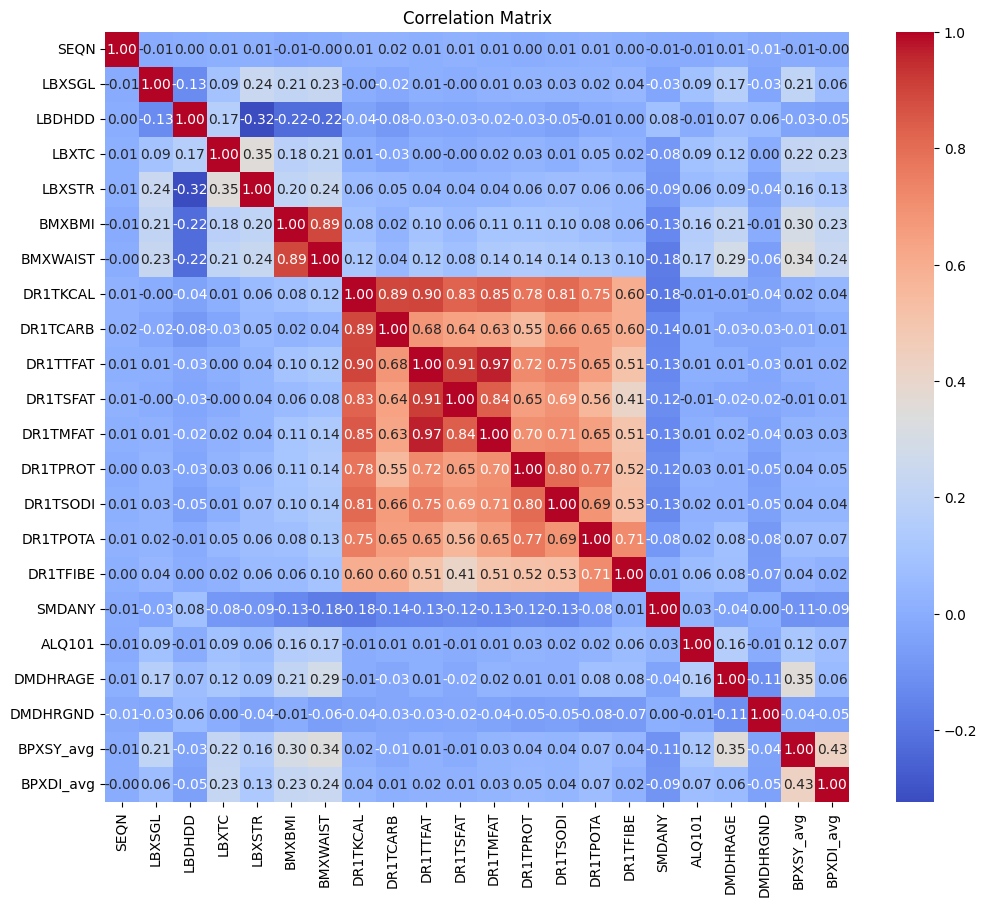

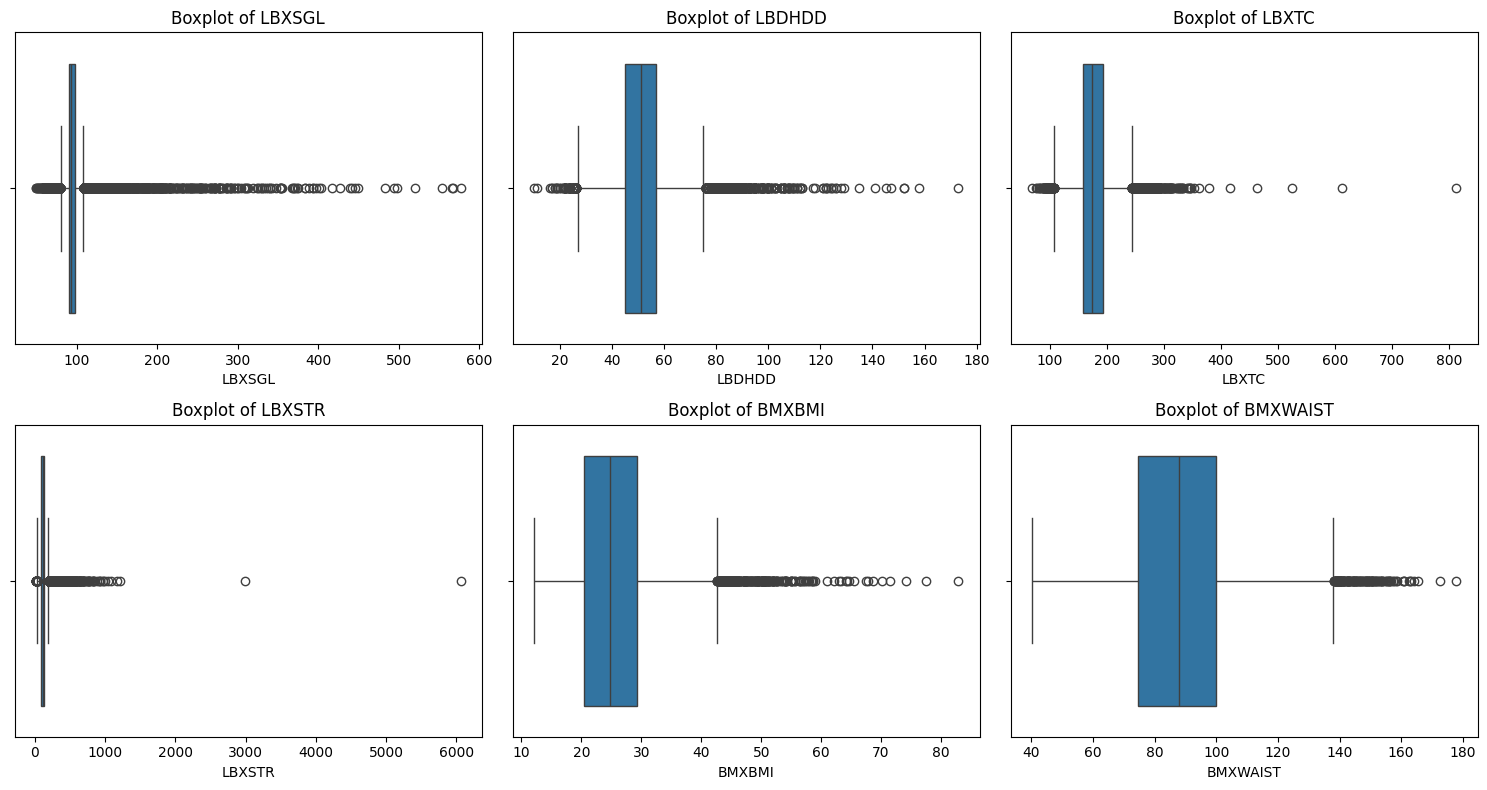

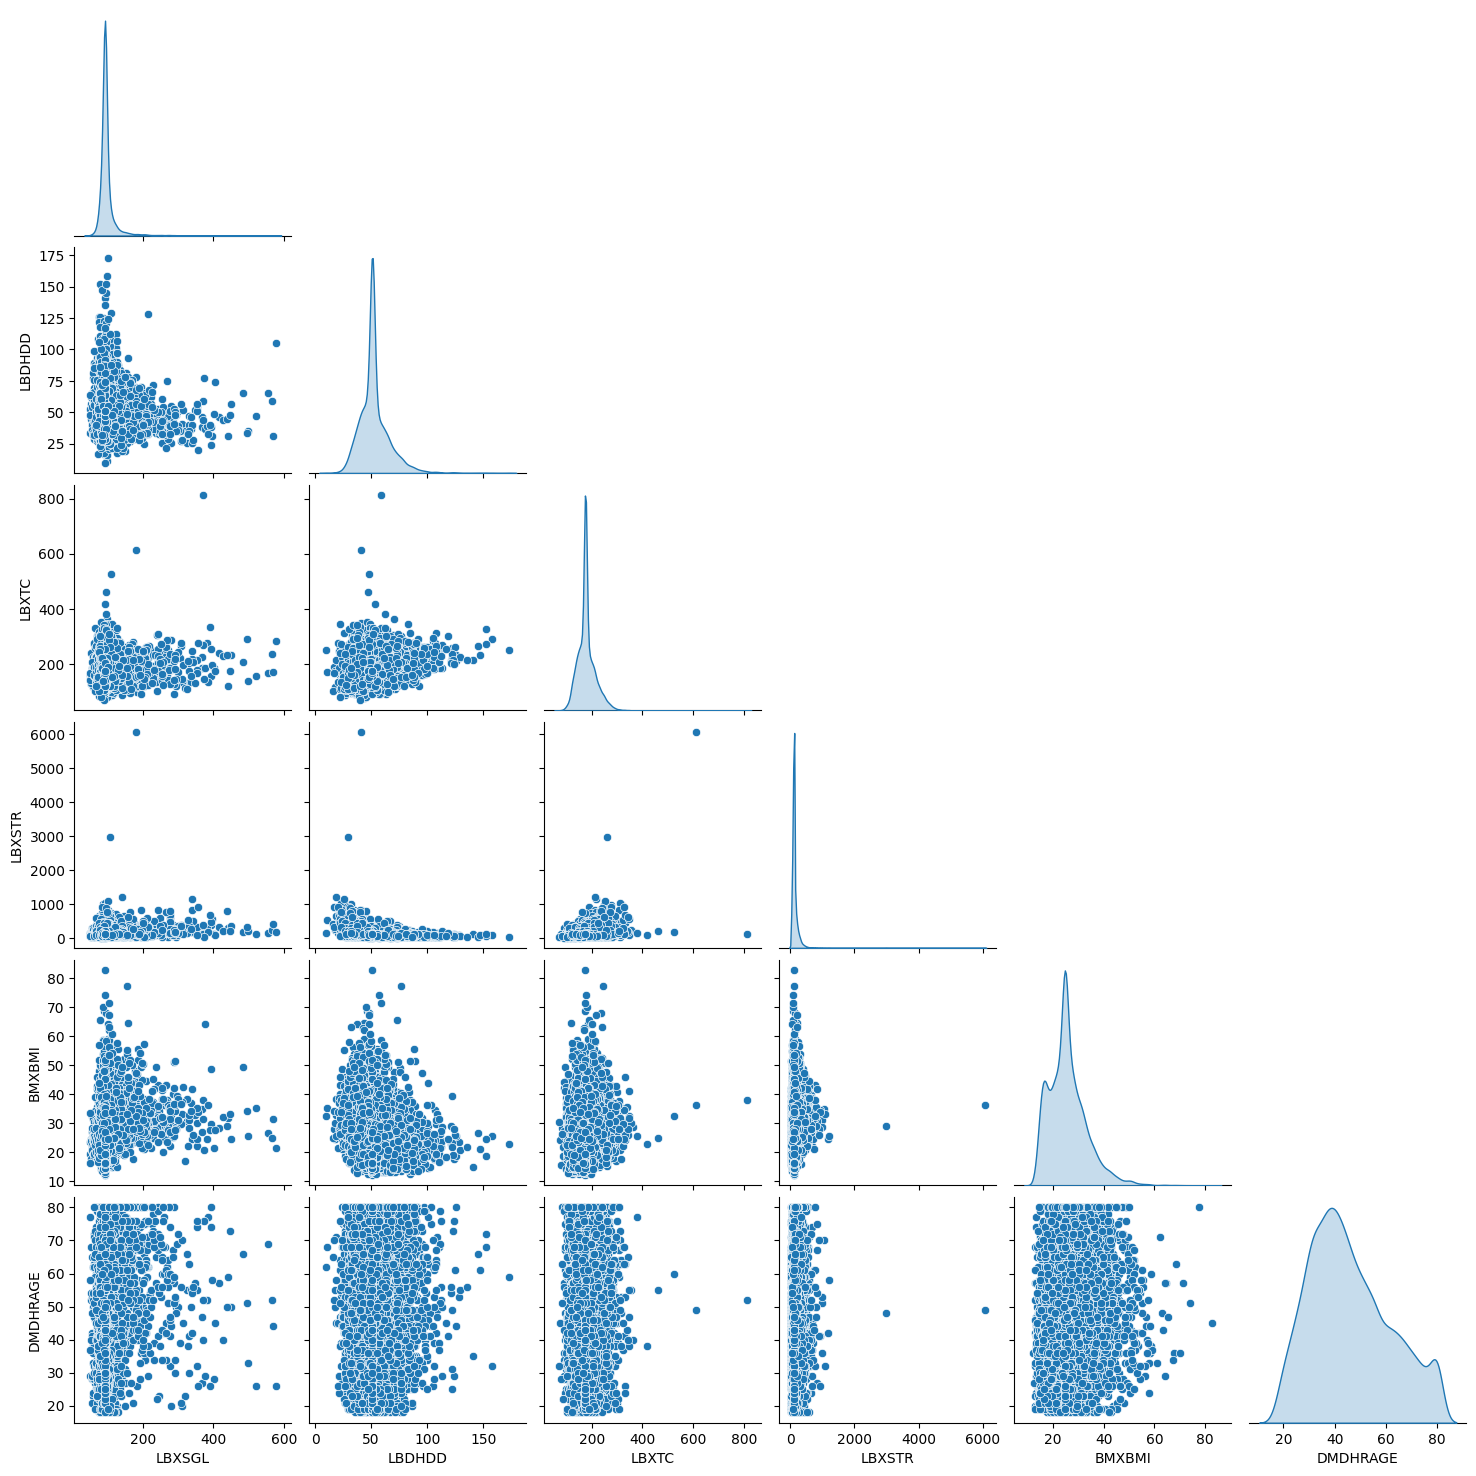

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = merged_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

# List of crucial features for boxplots
crucial_features = ['LBXSGL', 'LBDHDD', 'LBXTC', 'LBXSTR', 'BMXBMI', 'BMXWAIST']

# Plot boxplots
plt.figure(figsize=(15, 8))
for i, feature in enumerate(crucial_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=merged_df, x=feature)
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.show()

# Select a subset of features for the pairplot
pairplot_features = ['LBXSGL', 'LBDHDD', 'LBXTC', 'LBXSTR', 'BMXBMI', 'DMDHRAGE']

# Create pairplot
sns.pairplot(merged_df[pairplot_features], diag_kind="kde", corner=True)
plt.show()


### Clustering

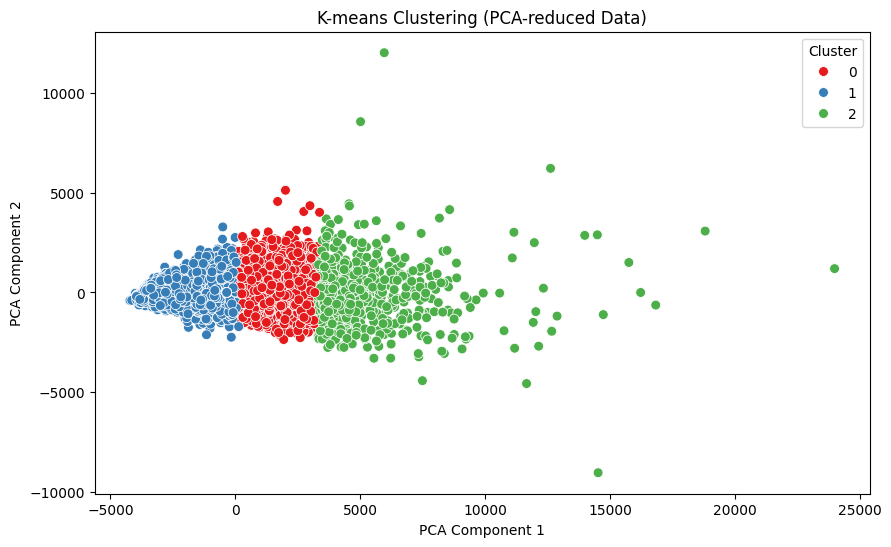

Silhouette Score for K-means Clustering: 0.42


In [21]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Features to use for clustering (excluding 'SEQN' as it is an ID)
clustering_features = merged_df.columns.drop(['SEQN'])

# Perform PCA for visualization (optional)
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(merged_df[clustering_features])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust 'n_clusters' as needed
kmeans_labels = kmeans.fit_predict(merged_df[clustering_features])

# Add cluster labels to the dataframe
merged_df['Cluster_KMeans'] = kmeans_labels

# Visualize clusters in 2D using PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_transformed[:, 0], y=pca_transformed[:, 1], hue=kmeans_labels, palette="Set1", s=50)
plt.title("K-means Clustering (PCA-reduced Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

# Evaluate clustering performance using silhouette score
silhouette_avg = silhouette_score(merged_df[clustering_features], kmeans_labels)
print(f"Silhouette Score for K-means Clustering: {silhouette_avg:.2f}")


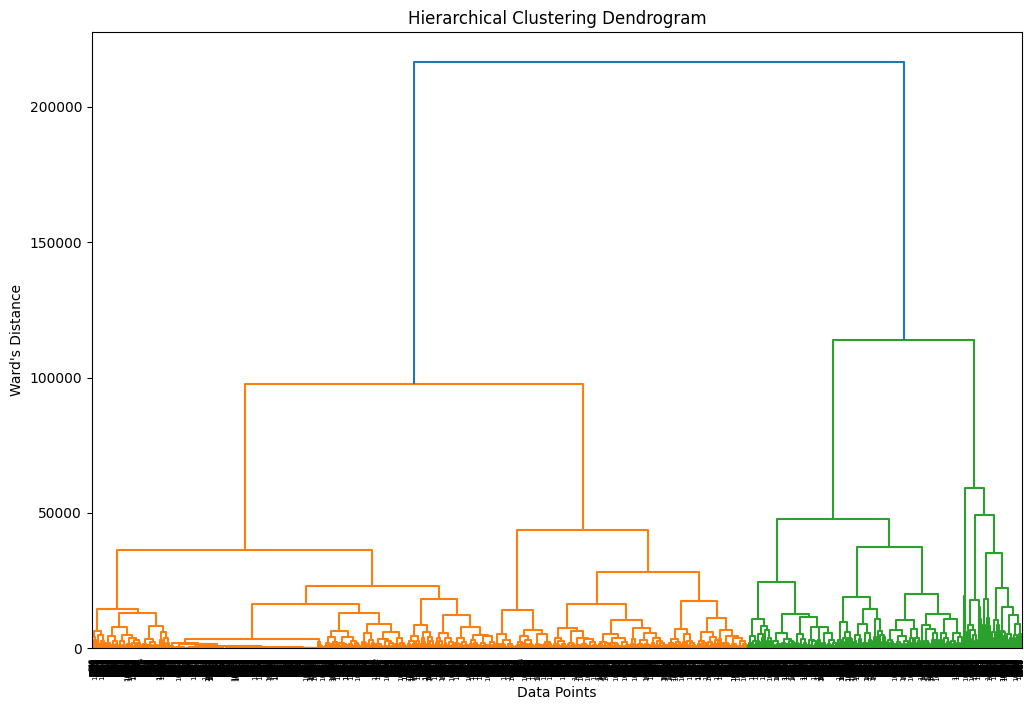

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

# Perform hierarchical clustering
linked = linkage(pdist(merged_df[clustering_features]), method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts=False)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Ward's Distance")
plt.show()


### Association Rules

In [23]:
# E.g. "Smokers who consume high sodium are likely to have high blood pressure."
from mlxtend.frequent_patterns import apriori, association_rules

# Binarize diet data
diet_data = merged_df[['DR1TSFAT', 'DR1TSODI', 'DR1TPROT']].apply(lambda x: x > x.median())
frequent_itemsets = apriori(diet_data, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

             antecedents           consequents   support  confidence      lift
0             (DR1TSFAT)            (DR1TSODI)  0.317445    0.757505  1.808025
1             (DR1TSODI)            (DR1TSFAT)  0.317445    0.757682  1.808025
2             (DR1TSFAT)            (DR1TPROT)  0.312138    0.744841  1.776964
3             (DR1TPROT)            (DR1TSFAT)  0.312138    0.744666  1.776964
4             (DR1TPROT)            (DR1TSODI)  0.340737    0.812896  1.940233
5             (DR1TSODI)            (DR1TPROT)  0.340737    0.813277  1.940233
6   (DR1TSFAT, DR1TPROT)            (DR1TSODI)  0.275577    0.882872  2.107253
7   (DR1TSFAT, DR1TSODI)            (DR1TPROT)  0.275577    0.868111  2.071051
8   (DR1TPROT, DR1TSODI)            (DR1TSFAT)  0.275577    0.808768  1.929929
9             (DR1TSFAT)  (DR1TPROT, DR1TSODI)  0.275577    0.657598  1.929929
10            (DR1TPROT)  (DR1TSFAT, DR1TSODI)  0.275577    0.657444  2.071051
11            (DR1TSODI)  (DR1TSFAT, DR1TPROT)  0.27

In [24]:
# "Are there specific dietary factors (e.g., sodium, potassium, saturated fats) associated with higher glucose levels?"

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Discretize continuous variables
merged_df['High_Glucose'] = (merged_df['LBXSGL'] > 100).astype(int)  # Threshold for high glucose
merged_df['High_Sodium'] = (merged_df['DR1TSODI'] > merged_df['DR1TSODI'].median()).astype(int)
merged_df['High_SaturatedFat'] = (merged_df['DR1TSFAT'] > merged_df['DR1TSFAT'].median()).astype(int)
merged_df['High_Potassium'] = (merged_df['DR1TPOTA'] > merged_df['DR1TPOTA'].median()).astype(int)

# Select variables for mining
assoc_df = merged_df[['High_Glucose', 'High_Sodium', 'High_SaturatedFat', 'High_Potassium']]

# Convert to boolean for apriori
assoc_df = assoc_df.astype(bool)

# Apply Apriori
frequent_itemsets = apriori(assoc_df, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Show top rules
rules = rules.sort_values(by="lift", ascending=False)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(5))

                            antecedents                          consequents  \
14                        (High_Sodium)  (High_SaturatedFat, High_Potassium)   
11  (High_SaturatedFat, High_Potassium)                        (High_Sodium)   
13                  (High_SaturatedFat)        (High_Sodium, High_Potassium)   
12        (High_Sodium, High_Potassium)                  (High_SaturatedFat)   
15                     (High_Potassium)     (High_SaturatedFat, High_Sodium)   

     support  confidence      lift  
14  0.245307    0.585503  2.024293  
11  0.245307    0.848114  2.024293  
13  0.245307    0.585366  1.892026  
12  0.245307    0.792884  1.892026  
15  0.245307    0.585641  1.844858  


### Predictive Modeling

In [25]:
def categorize_mets(row):
    conditions_met = 0
    
    # Waist Circumference (based on gender)
    if (row['DMDHRGND'] == 1 and row['BMXWAIST'] > 102) or (row['DMDHRGND'] == 2 and row['BMXWAIST'] > 88):
        conditions_met += 1
    
    # HDL Cholesterol
    if (row['DMDHRGND'] == 1 and row['LBDHDD'] < 40) or (row['DMDHRGND'] == 2 and row['LBDHDD'] < 50):
        conditions_met += 1
    
    # Blood Pressure (using average of the 3 readings if available)
    avg_systolic_bp = (row['BPXSY_avg'])
    avg_diastolic_bp = (row['BPXDI_avg'])
    if avg_systolic_bp > 130 or avg_diastolic_bp > 85:
        conditions_met += 1
    
    # Triglycerides
    if row['LBXSTR'] > 150:
        conditions_met += 1
    
    # Glucose
    if row['LBXSGL'] > 100:
        conditions_met += 1
    
    # Dietary Factors (you could include other relevant features here)
    if row['DR1TKCAL'] > 2500:  # Example threshold for energy intake (you can adjust)
        conditions_met += 1
    
    if row['DR1TCARB'] > 300:  # Example threshold for carbs (adjust as needed)
        conditions_met += 1
    
    if row['DR1TTFAT'] > 80:  # Example threshold for total fat
        conditions_met += 1
    
    # Smoking and Alcohol (Optional but relevant for general health)
    if row['SMDANY'] == 1:  # If the person smokes
        conditions_met += 1
    
    if row['ALQ101'] == 1:  # If the person has had at least 12 drinks in the past year
        conditions_met += 1
    
    # Categorize based on conditions met
    if conditions_met == 0:
        return 'Low'
    elif conditions_met <= 2:
        return 'Moderate'
    else:
        return 'High'

# Apply the function to categorize 'MetS'
merged_df['MetS'] = merged_df.apply(categorize_mets, axis=1)

# Check the distribution
print(merged_df['MetS'].value_counts())


MetS
Moderate    5193
High        4803
Low          179
Name: count, dtype: int64


In [26]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming merged_df already has the 'MetS' column with the target variable
X = merged_df.drop(columns=['SEQN', 'MetS'])  # Features (exclude SEQN and target)
y = merged_df['MetS']  # Target variable

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42, sampling_strategy='auto')  # You can specify 'auto' for equal class distribution
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the distribution after SMOTE
print("Training set class distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())


Training set class distribution after SMOTE:
MetS
High        4174
Moderate    4174
Low         4174
Name: count, dtype: int64


In [27]:
from sklearn.model_selection import train_test_split

# Select features (excluding 'SEQN' and 'MetS')
features = ['LBXSGL', 'LBDHDD', 'LBXTC', 'LBXSTR', 'BMXBMI', 'BMXWAIST', 
            'BPXSY_avg', 'BPXDI_avg', 'DR1TKCAL', 'DR1TCARB', 'DR1TTFAT', 'DR1TSFAT', 'DR1TMFAT', 
            'DR1TPROT', 'DR1TSODI', 'DR1TPOTA', 'DR1TFIBE', 'SMDANY', 
            'ALQ101', 'DMDHRAGE', 'DMDHRGND']

X1 = merged_df[features]
y1 = merged_df['MetS']

# Handle missing values by filling them (you can use mean or median for simplicity)
X1 = X1.fillna(X.mean())

# Split data into train and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score

# Initialize Logistic Regression with class weights
log_reg_model = LogisticRegression(class_weight='balanced', random_state=42)

# Train the model on resampled data
log_reg_model.fit(X_train_resampled, y_train_resampled)

# Evaluate the model on the test set
y_pred_log_reg = log_reg_model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

# ROC AUC Score
roc_auc = roc_auc_score(y_test, log_reg_model.predict_proba(X_test), multi_class='ovr')
print(f"ROC AUC Score (Logistic Regression): {roc_auc}")


Logistic Regression Classification Report:
              precision    recall  f1-score   support

        High       0.81      0.74      0.77       977
         Low       0.07      0.67      0.12        39
    Moderate       0.80      0.59      0.68      1019

    accuracy                           0.66      2035
   macro avg       0.56      0.67      0.52      2035
weighted avg       0.79      0.66      0.71      2035

Confusion Matrix:
[[719 112 146]
 [  4  26   9]
 [170 243 606]]
ROC AUC Score (Logistic Regression): 0.8208321833246607


C:\Users\patry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.svm import SVC

# Initialize SVM with class weights
svm_model = SVC(class_weight='balanced', kernel='linear', random_state=42, decision_function_shape='ovo')

# Train the model on resampled data
svm_model.fit(X_train_resampled, y_train_resampled)

# Evaluate the model on the test set
y_pred_svm = svm_model.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

# ROC AUC Score
roc_auc_svm = roc_auc_score(y_test, svm_model.predict_proba(X_test), multi_class='ovr')
print(f"ROC AUC Score (SVM): {roc_auc_svm}")


In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, classification_report, confusion_matrix, roc_auc_score
import numpy as np

# Define features and target
X = merged_df.drop(columns=['SEQN', 'MetS'])
y = merged_df['MetS'].map({'Low': 0, 'Moderate': 1, 'High': 2})

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Cross-validation setup
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Helper function to evaluate models with cross-validation
def evaluate_model(model, X, y):
    # Cross-validate using the F1-score as the metric
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring='f1_weighted')
    print(f"Cross-Validation F1 Score: Mean = {cv_scores.mean():.4f}, Std = {cv_scores.std():.4f}")
    
    # Also evaluate using other metrics
    y_pred = cross_val_predict(model, X, y, cv=cv)
    print("Classification Report:\n", classification_report(y, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
    
    # Compute AUC score (Note: for multi-class, use roc_auc_ovo for one-vs-one or roc_auc_ovr for one-vs-rest)
    auc_score = roc_auc_score(y, model.fit(X, y).predict_proba(X), multi_class='ovr', average='weighted')
    print(f"AUC Score: {auc_score:.4f}")

# Step 1: SVM Cross-validation and Hyperparameter Tuning
svm_params = {
    'kernel': ['linear', 'rbf'], 
    'C': [0.1, 1, 10], 
    'gamma': ['scale', 'auto']
}

# SVM GridSearchCV
svm_grid = GridSearchCV(SVC(random_state=42), svm_params, cv=cv, scoring='f1_weighted', n_jobs=-1)
svm_grid.fit(X_scaled, y)

print("Best SVM Parameters:", svm_grid.best_params_)
evaluate_model(svm_grid.best_estimator_, X_scaled, y)

# Step 2: Logistic Regression Cross-validation and Hyperparameter Tuning
lr_params = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],  # solvers that support L1 regularization
    'max_iter': [100, 200, 500]
}

# Logistic Regression GridSearchCV
lr_grid = GridSearchCV(LogisticRegression(multi_class='ovr', random_state=42), lr_params, cv=cv, scoring='f1_weighted', n_jobs=-1)
lr_grid.fit(X_scaled, y)

print("Best Logistic Regression Parameters:", lr_grid.best_params_)
evaluate_model(lr_grid.best_estimator_, X_scaled, y)

C:\Users\patry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


Best SVM Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


C:\Users\patry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


Cross-Validation F1 Score: Mean = 0.9998, Std = 0.0007


C:\Users\patry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       711
           1       1.00      1.00      1.00      9460
           2       1.00      0.75      0.86         4

    accuracy                           1.00     10175
   macro avg       1.00      0.92      0.95     10175
weighted avg       1.00      1.00      1.00     10175

Confusion Matrix:
 [[ 711    0    0]
 [   1 9459    0]
 [   0    1    3]]


AttributeError: This 'SVC' has no attribute 'predict_proba'